# IEEEG1 and Its Variants

In [1]:
import matplotlib.pyplot as plt

import andes

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(30)

In [4]:
s1 = andes.load(andes.get_case('kundur/kundur_ieeeg1.xlsx'),
                setup=False, no_output=True, default_config=True)
s2 = andes.load(andes.get_case('kundur/kundur_ieeeg1gv.json'),
                setup=False, no_output=True, default_config=True)
s3 = andes.load(andes.get_case('kundur/kundur_ieeeg1ts.json'),
                setup=False, no_output=True, default_config=True)
s4 = andes.load(andes.get_case('kundur/kundur_ieeeg1ts2.json'),
                setup=False, no_output=True, default_config=True)
            
for ss in [s1, s2, s3, s4]:

    ss.Toggle.alter(src='u', idx=1, value=0)

    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_0', src='Ppf',
                           attr='v', method='+', amount=0.4))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.4))

    ss.setup()

for ss in [s1, s2, s3, s4]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

In [5]:
for ss in [s1, s2, s3, s4]:
    _ = ss.TDS.init()

In [6]:
for ss in [s1, s2, s3, s4]:
    ss.TDS.config.tf = 100
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True
    ss.TDS.run()

<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.
<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.
<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.
<Alter Alter_2>: set PQ.PQ_0.Ppf.v=11.99 at t=1. Previous value was 11.59.
<Alter Alter_3>: set PQ.PQ_1.Ppf.v=16.15 at t=1. Previous value was 15.75.


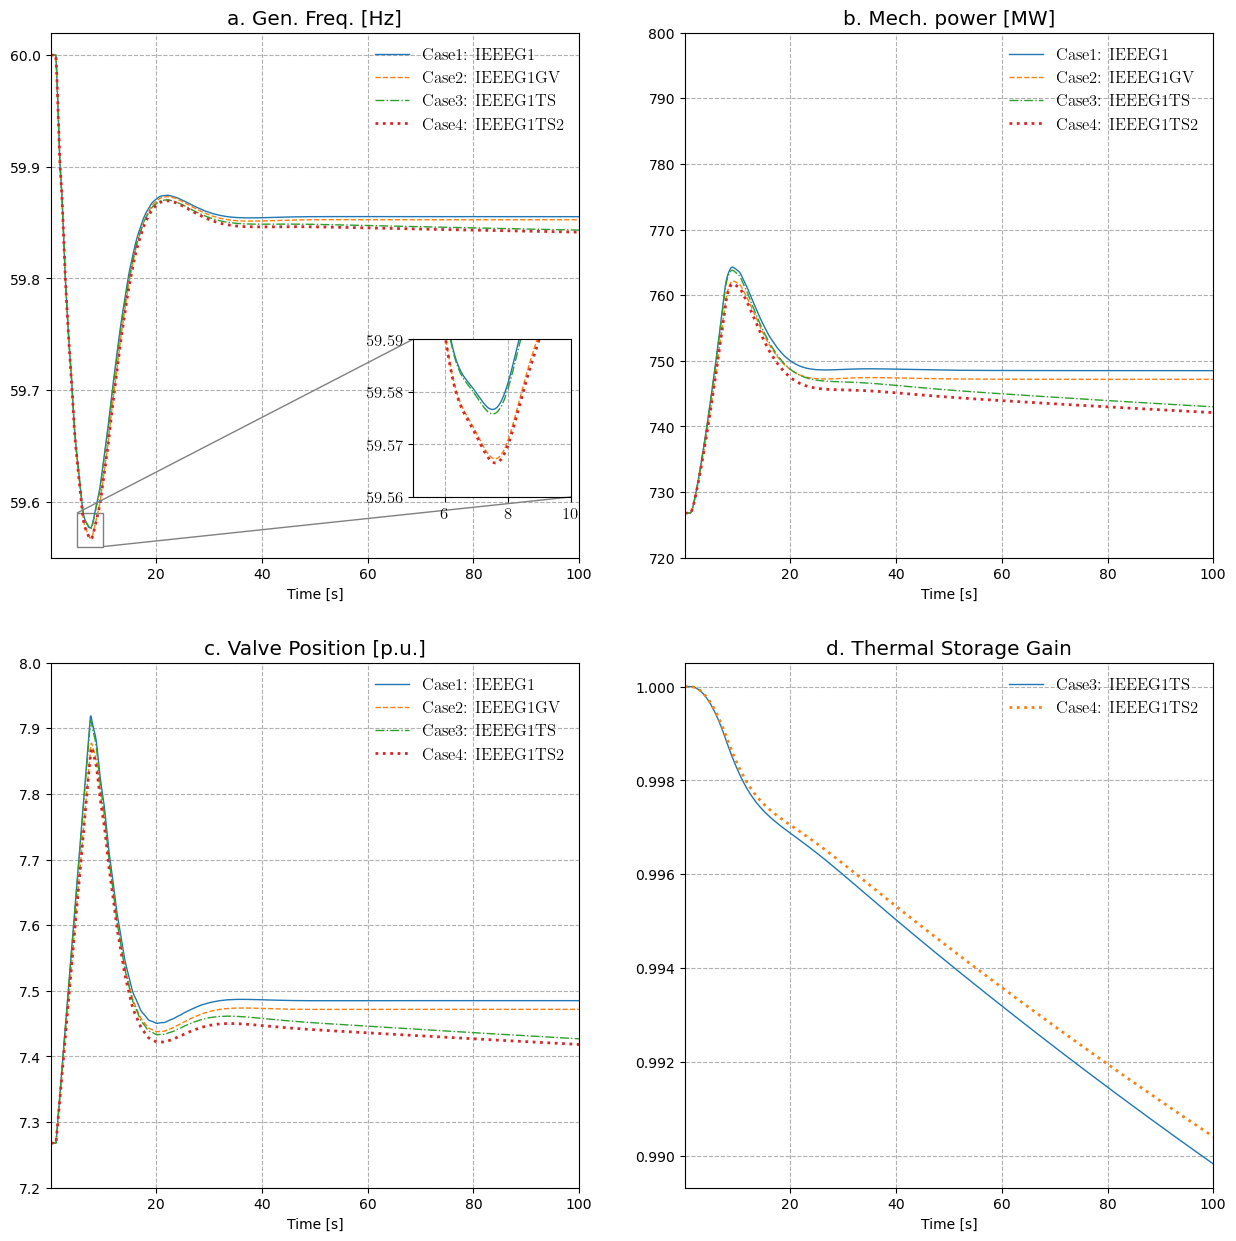

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

plt.style.use('default')

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

a = (3,)
fmin, fmax = 59.55, 60.02
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    grid=True, show=False, latex=False,
                    yheader=['Case1: IEEEG1'],
                    title='a. Gen. Freq. [Hz]',
                    fig=fig, ax=ax[0, 0])
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s2.config.freq,
                    show=False,
                    yheader=['Case2: IEEEG1GV'],
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 0])
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=a,
                    ytimes=s3.config.freq,
                    show=False,
                    yheader=['Case3: IEEEG1TS'],
                    linestyles=['-.'],
                    fig=fig, ax=ax[0, 0])
_ = s4.TDS.plt.plot(s4.GENROU.omega,
                    a=a,
                    ytimes=s4.config.freq,
                    show=False,
                    yheader=['Case4: IEEEG1TS2'],
                    linestyles=[':'],
                    line_width=2,
                    fig=fig, ax=ax[0, 0])

# Add a zoom-in inset

# Create inset axes
axins = inset_axes(ax[0, 0], width="30%", height="30%", loc="lower right",
                   bbox_to_anchor=(0.001, 0.1, 1, 1), bbox_transform=ax[0, 0].transAxes)

# Plot zoomed-in data
fminzoom, fmaxzoom = 59.56, 59.59
t0zoom, t1zoom = 5, 10
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fminzoom, ymax=fmaxzoom,
                    xmin=0, xmax=20,
                    ytimes=s1.config.freq,
                    grid=True, show=False, latex=False,
                    legend=False,
                    fig=fig, ax=axins)
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s2.config.freq,
                    show=False,
                    legend=False,
                    linestyles=['--'],
                    fig=fig, ax=axins)
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=a,
                    ytimes=s3.config.freq,
                    show=False,
                    legend=False,
                    linestyles=['-.'],
                    fig=fig, ax=axins)
_ = s4.TDS.plt.plot(s4.GENROU.omega,
                    a=a,
                    ytimes=s4.config.freq,
                    show=False,
                    legend=False,
                    linestyles=[':'],
                    line_width=2,
                    fig=fig, ax=axins)

# Set zoom-in limits
axins.set_xlim(t0zoom, t1zoom)
axins.set_ylim(fminzoom, fmaxzoom)
axins.set_xlabel('')

# Add connecting lines between inset and main plot
mark_inset(ax[0, 0], axins, loc1=2, loc2=4, fc="none", ec="0.5")

a = (0,)
pmin, pmax = 720, 800
_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymin=pmin, ymax=pmax,
                    ytimes=s1.config.mva,
                    yheader=['Case1: IEEEG1']*len(a),
                    title='b. Mech. power [MW]',
                    fig=fig, ax=ax[0, 1])
_ = s2.TDS.plt.plot(s2.IEEEG1GV.pout,
                    show=False,
                    ytimes=s2.config.mva,
                    yheader=['Case2: IEEEG1GV']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[0, 1])
_ = s3.TDS.plt.plot(s3.IEEEG1TS.pout,
                    show=False,
                    ytimes=s3.config.mva,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    linestyles=['-.'],
                    fig=fig, ax=ax[0, 1])
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.pout,
                    show=False,
                    ytimes=s4.config.mva,
                    yheader=['Case4: IEEEG1TS2']*len(a),
                    linestyles=[':'],
                    line_width=2,
                    fig=fig, ax=ax[0, 1])

a = (0,)
vmin, vmax = 7.2, 8
_ = s1.TDS.plt.plot(s1.IEEEG1.GV,
                    a=a,
                    grid=True, show=False, latex=False,
                    ymin=vmin, ymax=vmax,
                    yheader=['Case1: IEEEG1']*len(a),
                    title='c. Valve Position [p.u.]',
                    fig=fig, ax=ax[1, 0])
_ = s2.TDS.plt.plot(s2.IEEEG1GV.GV,
                    show=False,
                    yheader=['Case2: IEEEG1GV']*len(a),
                    linestyles=['--'],
                    fig=fig, ax=ax[1, 0])
_ = s3.TDS.plt.plot(s3.IEEEG1TS.GV,
                    show=False,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    linestyles=['-.'],
                    fig=fig, ax=ax[1, 0])
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.GV,
                    show=False,
                    yheader=['Case4: IEEEG1TS2']*len(a),
                    linestyles=[':'],
                    line_width=2,
                    fig=fig, ax=ax[1, 0])

_ = s3.TDS.plt.plot(s3.IEEEG1TS.TS.y,
                    ycalc=lambda x: 1 - x,
                    grid=True, show=False, latex=False,
                    yheader=['Case3: IEEEG1TS']*len(a),
                    title='d. Thermal Storage Gain',
                    fig=fig, ax=ax[1, 1])
_ = s4.TDS.plt.plot(s4.IEEEG1TS2.TS.y,
                    ycalc=lambda x: 1 - x,
                    show=False,
                    yheader=['Case4: IEEEG1TS2']*len(a),
                    linestyles=[':'],
                    line_width=2,
                    fig=fig, ax=ax[1, 1])